In [247]:
import pandas as pd
import AnalFunctions as af
import numpy as np
import matplotlib.pyplot as plt
import os

path, folder_list, N_runs, b, cross_var, folder_frame, test_str, test_var, test_var2, test_str2, lin_var, T_test_list, sec_test_var, N_ped, fps, mot_frac = af.var_ini()
af.file_writer(path, folder_list, N_runs, b, cross_var, folder_frame, test_str, test_var)

sl = "/"
T_test_list = lin_var[test_var2]
lattice_type = 'jule'
runs_tested = N_runs
traj_testvar2 = []


def dist(x1, y1, x2, y2, x3, y3): # x3,y3 is the point

    px = x2-x1
    py = y2-y1

    norm = px*px + py*py

    u =  ((x3 - x1) * px + (y3 - y1) * py) / float(norm)

    #u_new = np.array([1 if ui > 1 else 0 for ui in u])
    u[u > 1] = 1
    u[u < 0] = 0

    x = x1 + u * px
    y = y1 + u * py

    dx = x - x3
    dy = y - y3

    # Note: If the actual distance does not matter,
    # if you only want to compare what this function
    # returns to other results of this function, you
    # can just return the squared distance instead
    # (i.e. remove the sqrt) to gain a little performance

    dist = np.sqrt(dx*dx + dy*dy)
    return dist



current path is  trajectories/ini_lm_N_ped55_tmax152_size_0_17_fps_16_testvar_b/
0     0.1
1     1.3
2     0.1
3     1.3
4     0.1
5     1.3
6     0.1
7     1.3
8     0.1
9     1.3
10    0.1
11    1.3
Name: T, dtype: float64
[0.1 1.3 0.1 1.3 0.1 1.3 0.1 1.3 0.1 1.3 0.1 1.3]
[[ 0.7   0.6   1.34  0.1   3.6  55.    1.    0.25]
 [ 0.7   0.6   1.34  1.3   3.6  55.    1.    0.25]
 [ 0.7   1.15  1.34  0.1   3.6  55.    1.    0.25]
 [ 0.7   1.15  1.34  1.3   3.6  55.    1.    0.25]
 [ 0.7   1.7   1.34  0.1   3.6  55.    1.    0.25]
 [ 0.7   1.7   1.34  1.3   3.6  55.    1.    0.25]
 [ 0.7   2.25  1.34  0.1   3.6  55.    1.    0.25]
 [ 0.7   2.25  1.34  1.3   3.6  55.    1.    0.25]
 [ 0.7   2.8   1.34  0.1   3.6  55.    1.    0.25]
 [ 0.7   2.8   1.34  1.3   3.6  55.    1.    0.25]
 [ 0.7   3.    1.34  0.1   3.6  55.    1.    0.25]
 [ 0.7   3.    1.34  1.3   3.6  55.    1.    0.25]]
    Unnamed: 0                                         ini_folder     b    v0  \
0            0  ini_0_6_lm_55_e

In [248]:
waittime_list = []
test_var_list = []
test_var2_list = []
b_list = []
N_ped_list = []
T_list = []
os.system("mkdir " + path + "waittime")
t_min = 10
t_max = 30
t_start = t_min * fps
t_end = t_max * fps


In [249]:
from multiprocessing import Pool


In [250]:
set(1,2,2,3)

TypeError: set expected at most 1 arguments, got 4

In [165]:
col = ["FR","X","Y","ID","IntID"]
blist = 2 * lin_var[test_var]
v_0_list = []
from itertools import groupby
#N_del_i = 10
N_del = 10
for T_test in T_test_list[1:2]:
    folder_frame_frac = np.array(folder_frame.loc[folder_frame[test_str2] == T_test]['ini_folder'])
    b_folder = np.array(folder_frame.loc[folder_frame[test_str2] == T_test]['b'])
    loc_list = [[path + folder + sl + "new_evac_traj_" + af.b_data_name(2 * bi, 3) + "_" + str(i) + ".txt" for i in
                 range(runs_tested)] for folder, bi in zip(folder_frame_frac, b_folder)]
    bi = 0
    for loc_list_runs in loc_list:
        print("<calculating " + test_str + " = " + str(2 * lin_var[test_var][bi]) + ">")
        p0count = 0
        count = 0
        incount = 0
        for loc in loc_list_runs:
            if os.path.isfile(loc) == False:
                #print("WARNING: file " + loc + " not found.")
                continue
            df = pd.read_csv(loc, sep="\s+", header=0, comment="#",skipinitialspace=True, usecols=col)
            n_min_frame = df.groupby('ID')['FR'].min()[df['ID']].nsmallest(N_del_i).index.values
            n_max_frame = df.groupby('ID')['FR'].max()[df['ID']].nlargest(N_del).index.values
            #df = df[~df['ID'].isin(n_min_frame)]

            df = df[~df['ID'].isin(n_max_frame)]
            #framemax = df["FR"].max()
            #print(ids)
            #print(df_fr)
            print(df["FR"].min(),df["FR"].max())
            for t in np.arange(10 * fps,df["FR"].max()):
                #print("T=",t)
                df_t = df[df['FR'] == t]
                df_id = df_t['ID'].values
                df_int = df_t['IntID'].values
                df_new = pd.DataFrame({"ID":df_id,"IntID":df_int})
                np_new = df_new.values
                set_new = [set(i) for i in np_new]
                truec = np.array([len(list(group)) for key, group in groupby(set_new)]) > 1
                truec = truec.sum()
                count += truec
                incount += df_int.shape[0]
                #print(np.array([len(list(group)) for key, group in groupby(set_new)]) > 1 )

                #print(df_new.isin(np_new))
                #print(df_new)
        print(count)
        print(incount)
        print(count/incount)
                
                
        bi += 1           

<calculating b = 1.2>
0 965
0 994
0 990
0 982
0 996
0 1017
0 999
0 981
0 962
0 994
0 1012
0 1021
0 981
0 1015
0 1006
0 1038
0 998
0 1058
0 964
0 993
137
386075
0.0003548533316065531
<calculating b = 2.3>
0 1177
0 1267
0 1163
0 1172
0 1111
0 1326
0 1177
0 1168
0 1293
0 1226
0 1144
0 1278
0 1260
0 1151
0 1262
0 1295
0 1196
0 1123
0 1156
0 1326
1413
498667
0.002833554255645551
<calculating b = 3.4>
0 1220
0 1179
0 1206
0 1153
0 1210
0 1213
0 1190
0 1284
0 1192
0 1279
0 1324
0 1191
0 1136
0 1183
0 1154
0 1161
0 1196
0 1239
0 1182
0 1141
1506
497228
0.0030287916207454124
<calculating b = 4.5>
0 1090
0 1148
0 1170
0 1327
0 1112
0 1226
0 1092
0 1183
0 1150
0 1120
0 1116
0 1074
0 1214
0 1142
0 1247
0 1260
0 1119
0 1165
0 1254
0 1202
1615
486545
0.003319322981430289
<calculating b = 5.6>
0 1197
0 1193
0 1174
0 1113
0 1130
0 1061
0 1201
0 1123
0 1183
0 1152
0 1180
0 1315
0 1229
0 1148
0 1127
0 1197
0 1177
0 1294
0 1223
0 1257
1267
485219
0.0026111920596679026


<calculating b = 1.2>
0 1071
0 1064
0 1040
0 965
0 995
0 967
0 990
0 979
0 975
0 1052
0 999
0 965
0 989
0 1046
0 1001
0 964
0 1013
0 966
0 975
0 972
0 993
0 993
0 1004
0 975
0 984
0 1036
0 1001
0 1008
0 1005
0 1017
0 1024
0 1005
0 1013
0 1003
0 1003
0 991
0 980
0 1036
0 1018
0 1002
0 1007
0 1004
0 1056
0 970
0 1075
0 1015
0 997
0 1092
0 978
0 1013
counts_mean =  1.148730519939014
<calculating b = 1.2>
0 1250
0 1318
0 1127
0 1138
0 1239
0 1169
0 1185
0 1238
0 1329
0 1116
0 1180
0 1226
0 1223
0 1167
0 1227
0 1117
0 1235
0 1143
0 1246
0 1223
0 1304
0 1147
0 1185
0 1118
0 1110
0 1242
0 1187
0 1270
0 1156
0 1197
0 1190
0 1249
0 1181
0 1255
0 1175
0 1271
0 1250
0 1208
0 1155
0 1181
0 1196
0 1122
0 1226
0 1205
0 1154
0 1194
0 1179
0 1252
0 1166
0 1167
counts_mean =  1.3951267010888757
<calculating b = 1.2>
0 1212
0 1210
0 1142
0 1149
0 1203
0 1112
0 1290
0 1146
0 1242
0 1117
0 1241
0 1116
0 1217
0 1242
0 1206
0 1151
0 1217
0 1283
0 1170
0 1221
0 1119
0 1263
0 1195
0 1217
0 1283
0 1173
0 1287


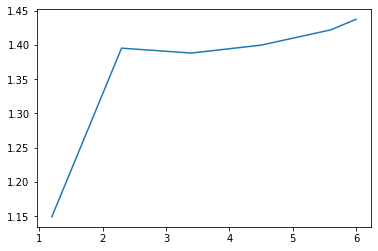

In [252]:
N_del = 10
for T_test in T_test_list[1:2]:
    folder_frame_frac = np.array(folder_frame.loc[folder_frame[test_str2] == T_test]['ini_folder'])
    b_folder = np.array(folder_frame.loc[folder_frame[test_str2] == T_test]['b'])
    loc_list = [[path + folder + sl + "new_evac_traj_" + af.b_data_name(2 * bi, 3) + "_" + str(i) + ".txt" for i in
                 range(runs_tested)] for folder, bi in zip(folder_frame_frac, b_folder)]
    bi = 0
    count_list = []

    for loc_list_runs in loc_list:
        print("<calculating " + test_str + " = " + str(2 * lin_var[test_var][bi]) + ">")
        p0count = 0
        count = 0
        incount = 0
        count_mean = 0
        time = np.arange(1 * fps,5 * fps,fps)
        n_count = 50 * time.shape[0]
        for loc in loc_list_runs:
            if os.path.isfile(loc) == False:
                #print("WARNING: file " + loc + " not found.")
                continue
            df = pd.read_csv(loc, sep="\s+", header=0, comment="#",skipinitialspace=True, usecols=col)
            n_min_frame = df.groupby('ID')['FR'].min()[df['ID']].nsmallest(N_del_i).index.values
            n_max_frame = df.groupby('ID')['FR'].max()[df['ID']].nlargest(N_del).index.values
            #df = df[~df['ID'].isin(n_min_frame)]

            df = df[~df['ID'].isin(n_max_frame)]
            #df = df[df['Y'] > 0]
            #df = df[df['X'] * df['X'] + df['Y']* df['Y'] < 1.5**2]
            #framemax = df["FR"].max()
            #print(ids)
            #print(df_fr)
            print(df["FR"].min(),df["FR"].max())
            
            
            
            for t in time:
                xpos = []
                ypos = []
                u = []
                v = []
                df_t = df[df["FR"] == t]
                #print(df_t)
                id_list = df_t["ID"].values
                int_list = df_t[df_t["IntID"]> 0]["IntID"].values
                unique, counts = np.unique(int_list, return_counts=True)
                #print(counts.mean())
                count_mean += counts.mean()
                #print(id_list)
                for i in id_list:
                    df_id = df_t[df_t["ID"] == i]
                    x1 = df_id["X"].values[0]
                    x2 = df_id["Y"].values[0]
                    inter = df_id["IntID"].values[0]
                    
                    #print(inter)
                    xpos.append([x1])
                    ypos.append([x2])
                    if inter > 0:
                        #print(inter)
                        #print(np.isin(inter,id_list))
                        df_int = df_t[df_t["ID"] == inter] 
                        #print(df_int)
                        
                        if(df_int.values.shape[0] > 0):
                            x1int = df_int["X"].values[0]
                            x2int = df_int["Y"].values[0]
                            u.append(x1int - x1)
                            v.append(x2int - x2)
                        else:
                            u.append(0)
                            v.append(0)
                    else:
                        u.append(0)
                        v.append(0)
                #fig, ax = plt.subplots(figsize = (12, 7))
                #plt.scatter(xpos,ypos)
                #ax.quiver(xpos, ypos, u, v,angles='xy', scale_units='xy',scale = 1)
                #ax.set_aspect("equal")


  
                #ax.axis([-3, 3, -1, 5]) 
  
                 #show plot 
                #plt.show() 
        print("counts_mean = ", count_mean/n_count)
        count_list.append(count_mean/n_count)
    plt.plot(2 * lin_var[test_var],count_list)
                    
                            

<calculating b = 1.2>
2


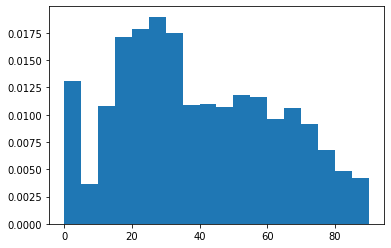

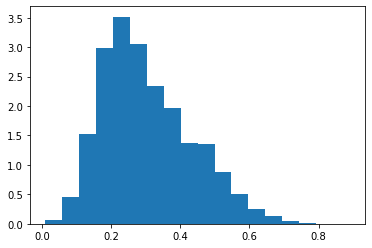

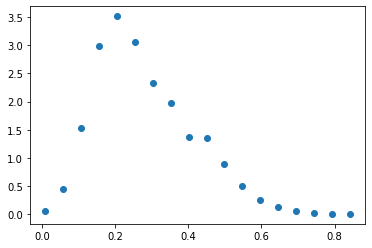

0.3037698001480385
39.58836475907006
<calculating b = 2.3>
20


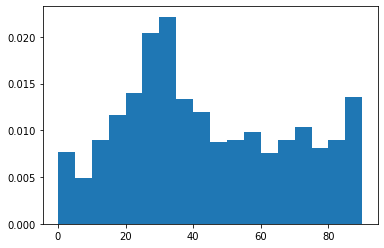

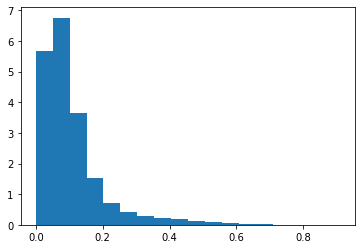

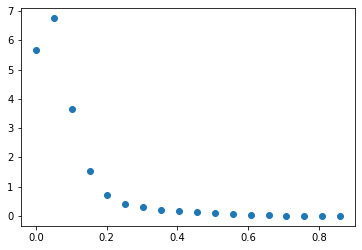

0.10988669007341206
44.08397353800435
<calculating b = 3.4>
19


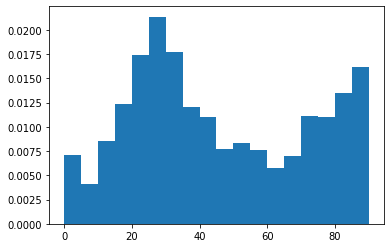

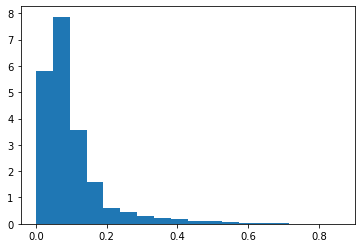

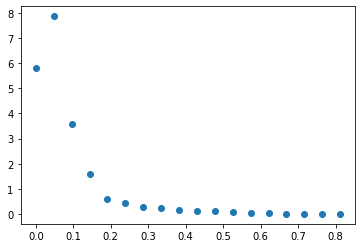

0.0983364866414402
45.68114775453726
<calculating b = 4.5>
18


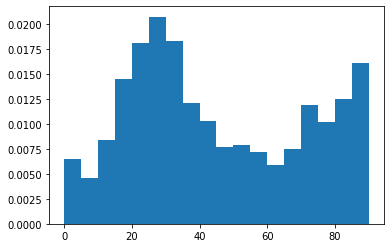

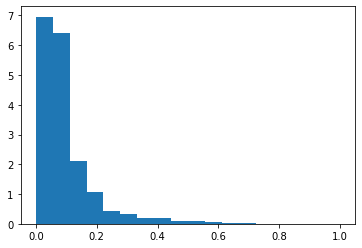

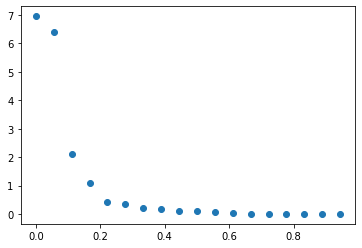

0.09792927908524886
45.17895381657351
<calculating b = 5.6>
20


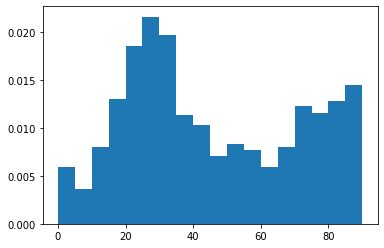

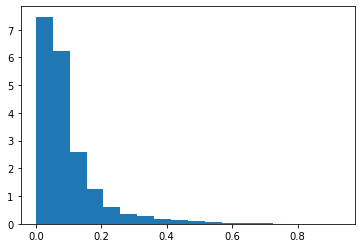

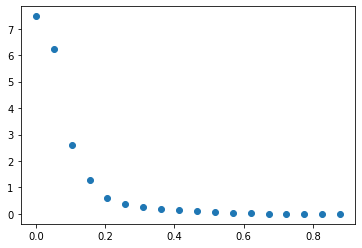

0.09719562439201175
45.67478591921606


In [9]:
col = ["FR","X","Y","ID","speed_nn","ANGLE_int_nn"]
blist = 2 * lin_var[test_var]
v_0_list = []
for T_test in T_test_list[1:2]:
    folder_frame_frac = np.array(folder_frame.loc[folder_frame[test_str2] == T_test]['ini_folder'])
    b_folder = np.array(folder_frame.loc[folder_frame[test_str2] == T_test]['b'])

    loc_list = [[path + folder + sl + "new_evac_traj_" + af.b_data_name(2 * bi, 3) + "_" + str(i) + ".txt" for i in
                 range(runs_tested)] for folder, bi in zip(folder_frame_frac, b_folder)]
    bi = 0
    
    v_0_mean = np.empty(blist.shape[0])
    v_0_var = np.empty(blist.shape[0])
    angle_nn_mean = np.empty(blist.shape[0])
    for loc_list_runs in loc_list:
        print("<calculating " + test_str + " = " + str(2 * lin_var[test_var][bi]) + ">")
        v_nn_mean = np.empty(0)
        angle_nn = np.empty(0)
        p0count = 0
        for loc in loc_list_runs:
            if os.path.isfile(loc) == False:
                #print("WARNING: file " + loc + " not found.")
                continue
            df = pd.read_csv(loc, sep="\s+", header=0, comment="#",skipinitialspace=True, usecols=col)
            #df['ANGLE_int_nn'] = df['ANGLE_int_nn'].values.astype(np.float)
            df = df[df['FR'] > 10 * fps]
            df = df[df['ANGLE_int_nn'].values.astype(np.float) >= 0.0]
            df = df[df['speed_nn'].values.astype(np.float) >= 0.0]
            df = df[df['speed_nn'].values.astype(np.float) < 1.34]
            p0 = df.groupby('FR')['speed_nn'].max()
            p0 = p0[p0.values < 0.1].values.shape[0]
            #print(p0)
            if p0 > 0:
                p0count += 1
            
            #print(p0)
            df = df[df['FR'] > fps * 10]
            df = df[df['Y'] > 0]
            df = df[df['X'] * df['X'] + df['Y']* df['Y'] < 1.]
            v_nn_mean = np.append(v_nn_mean,df['speed_nn'].values.astype(np.float))  
            #df = df[abs(df['X']) < 0.5]
            #df = df[df['Y'] > 1]

            #df = df[df['Y'] < 1]

            angle_nn = np.append(angle_nn,np.arccos(df['ANGLE_int_nn'].values.astype(np.float))*180./3.1415)
        print(p0count)
        #plt.hist(v_nn_mean,bins=50)
        #plt.show()

        x, bins, p= plt.hist(angle_nn,bins=18,density=True)        
        plt.show()

        x, bins, p =plt.hist(v_nn_mean,bins = 18,density=True)
        plt.show()

        nphist = np.histogram(v_nn_mean,bins=18,density = True)
        #plt.plot(nphist[1][:-1],np.log(-np.log(1-nphist[0])), marker = "o", linestyle='none')
        plt.plot(nphist[1][:-1],nphist[0], marker = "o", linestyle='none')
        #plt.xscale("log")
        #plt.yscale("log")
        plt.show()
        #print(v_nn_mean)
        v_0_list.append(v_nn_mean.mean())
        v_0_mean[bi] = v_nn_mean.mean()
        v_0_var[bi] = v_nn_mean.std()
        print(v_nn_mean.mean())
        angle_nn_mean[bi] = angle_nn.mean()
        print(angle_nn.mean())
        bi += 1
        #print(v_nn_mean.mean())


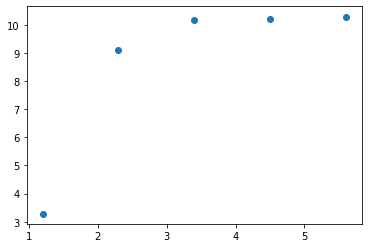

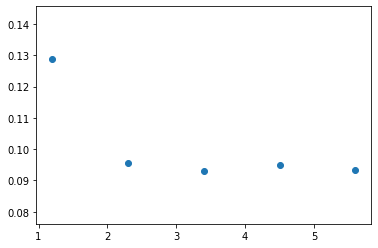

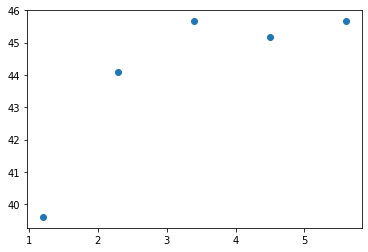

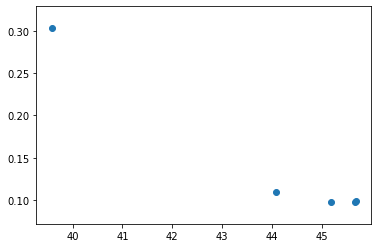

In [10]:
#plt.yscale("exp")
#plt.xscale("log")
plt.scatter(blist,1/v_0_mean)

plt.show()

plt.scatter(blist,v_0_var)
plt.show()
plt.scatter(blist,angle_nn_mean)
plt.show()

plt.scatter(angle_nn_mean,v_0_mean)

plt.show()


<calculating b = 0.55>


/Users/jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in true_divide


</calculating b = 0.55>


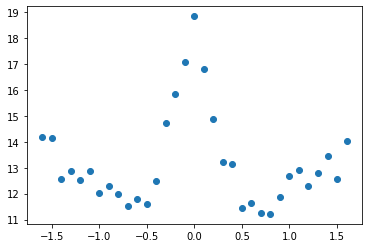

In [45]:
col = ["FR","X","Y","ID"]
t_array = np.arange(t_start, 100 * fps, int(fps/2 ))#
for T_test in T_test_list[0:1]:
    folder_frame_frac = np.array(folder_frame.loc[folder_frame[test_str2] == T_test]['ini_folder'])
    b_folder = np.array(folder_frame.loc[folder_frame[test_str2] == T_test]['b'])

    loc_list = [[path + folder + sl + "new_evac_traj_" + af.b_data_name(2 * bi, 3) + "_" + str(i) + ".txt" for i in
                 range(runs_tested)] for folder, bi in zip(folder_frame_frac, b_folder)]
    bi = 0
    ttt_arr = np.empty(0)
    dist_arr = np.empty(0)
    angle_arr = np.empty(0)
    x_ar = np.empty(0)
    y_ar = np.empty(0)
    for loc_list_runs in loc_list[-2:-1]:
        print("<calculating " + test_str + " = " + str(lin_var[test_var][bi]) + ">")

        for loc in loc_list_runs:
            df = pd.read_csv(loc, sep="\s+", header=0, comment="#",skipinitialspace=True, usecols=col)
            min_value = df.groupby('ID')['Y'].min()[df['ID']][0:N_ped - 1]
            #n_max_frame = df.groupby('ID')['FR'].max()[df['ID']][0:N_ped - 1].nlargest(12).index.values
            #print(n_max_frame)
            min_value = min_value[min_value < -0.2]
            key_filtered = min_value.keys().values
            
            df = df[df['ID'].isin(key_filtered)]
            df = df[df['Y'] > 0.]
            df = df[~df['ID'].isin(n_max_frame)]
            
            max_frame = df.groupby('ID')['FR'].max()[df['ID']]
            #print(max_frame.groupby('ID').nlargest(1))
            df['max_frame'] = max_frame.values
            df = df[df['FR'].isin(t_array)]

            #print(max_frame)


            x = df['X'].values
            y = df['Y'].values
            #dist_ttt = np.round(dist(-0.4, 0., 0.4, 0., x, y),2)
            dist_ttt = np.round(np.sqrt( x * x + y * y),1)
            angle_ttt = np.round(np.arctan(y/x),1)
            ttt = df['max_frame'].values - df['FR'].values
            ttt_arr = np.append(ttt_arr,ttt)
            dist_arr = np.append(dist_arr,dist_ttt)
            angle_arr = np.append(angle_arr,angle_ttt)
            x_ar = np.append(x_ar,x)
            y_ar = np.append(y_ar,y)
        print("</calculating " + test_str + " = " + str(lin_var[test_var][bi]) + ">")
        #print(dist_ttt.shape)
        #print(ttt.shape)
        #print(np.array(ttt_arr))
        df_plot = pd.DataFrame({"ttt" :  ttt_arr  / fps,"angle":angle_arr, "dist": dist_arr,"x":x_ar,"y":y_ar })
        #plt.plot(dist_arr,ttt_arr/fps,marker = "o",linestyle='none')
        #print(df_plot)
        #print(df_plot)
        bi += 1
        df_mean = df_plot[df_plot["dist"] < 1.2]
        df_mean = df_mean[df_mean["dist"] > 1.0]

        df_mean = df_mean.groupby("angle").mean()
        #print(df_mean)
        plt.plot(df_mean.index,df_mean["ttt"],marker = "o",linestyle='none')
        #plt.xscale('log')
        #plt.yscale('log')
        plt.show()
        #plt.plot(df_plot["dist"].values, ttt_mean_list,marker = "o",linestyle='none')
   # plt.show()


In [35]:
"""theta = df_plot['angle'].values
r = df_plot['dist'].values
ttt = df_plot['ttt'].values

x_arr = r * np.cos(theta)
y_arr = r * np.sin(theta)

x, y = np.meshgrid(x_arr, y_arr)
ttt_mesh = np.meshgrid(ttt,ttt)
z = ttt_mesh[:-1, :-1].flatten()

z_min, z_max = np.abs(z).min(), np.abs(z).max()
fig, ax = plt.subplots()
c = ax.pcolormesh(x, y, z, cmap='hot', vmin=z_min, vmax=12, label="density in [m^-2]")
# set the limits of the plot to the limits of the data
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax, label="$\\rho$ in [$m^{-2}$]")
print(z.mean())
print("corridor width = ", bi)
if bi == 1.7 or bi == 1.2:
    print("density jump")
line_width = 2.5
add_wall(line_width,bi*2)
name_var = lin_var[test_var][test_var_count]
test_var_count += 1"""

'theta = df_plot[\'angle\'].values\nr = df_plot[\'dist\'].values\nttt = df_plot[\'ttt\'].values\n\nx_arr = r * np.cos(theta)\ny_arr = r * np.sin(theta)\n\nx, y = np.meshgrid(x_arr, y_arr)\nttt_mesh = np.meshgrid(ttt,ttt)\nz = ttt_mesh[:-1, :-1].flatten()\n\nz_min, z_max = np.abs(z).min(), np.abs(z).max()\nfig, ax = plt.subplots()\nc = ax.pcolormesh(x, y, z, cmap=\'hot\', vmin=z_min, vmax=12, label="density in [m^-2]")\n# set the limits of the plot to the limits of the data\nax.axis([x.min(), x.max(), y.min(), y.max()])\nfig.colorbar(c, ax=ax, label="$\\rho$ in [$m^{-2}$]")\nprint(z.mean())\nprint("corridor width = ", bi)\nif bi == 1.7 or bi == 1.2:\n    print("density jump")\nline_width = 2.5\nadd_wall(line_width,bi*2)\nname_var = lin_var[test_var][test_var_count]\ntest_var_count += 1'

In [36]:
"""df_plot['x']= np.round(x_arr,1)
df_plot['y']= np.round(y_arr,1)
df_heat = pd.DataFrame({"x":np.round(x_arr,1),"y":np.round(y_arr,1),"ttt":ttt_arr/fps})"""

'df_plot[\'x\']= np.round(x_arr,1)\ndf_plot[\'y\']= np.round(y_arr,1)\ndf_heat = pd.DataFrame({"x":np.round(x_arr,1),"y":np.round(y_arr,1),"ttt":ttt_arr/fps})'

In [46]:
x_arr = np.round(np.arange(-3.5,3.5,0.1),1)
y_arr = np.round(np.arange(0,10,0.1),1)


In [56]:
ttt_arr = np.zeros([y_arr.shape[0],x_arr.shape[0]])
df_plot2 = df_plot
df_plot2['x'] = np.round(df_plot2['x'].values,1)
df_plot2['y'] = np.round(df_plot2['y'].values,1)

x_i = 0
for x in x_arr:
    y_i = 0
    for y in y_arr:
        x_bool = df_plot2['x'] == x
        df_new = df_plot2[x_bool]
        y_bool = df_new['y'] == y

        df_new = df_new[y_bool]
        #print(df_new['ttt'].values.shape[0])
        if (df_new['ttt'].values.shape[0]  and x*x + y*y < 4 and x*x + y * y > 0.09):
            ttt_arr[y_i][x_i] += df_new['ttt'].values.sum()/df_new['ttt'].values.shape[0]
            
        y_i += 1
    x_i += 1


In [57]:
print(x_arr.shape,y_arr.shape)
ttt_arr.shape

(70,) (100,)


(100, 70)

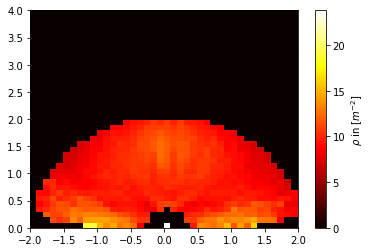

In [58]:
x, y = np.meshgrid(x_arr, y_arr)

r = x * x + y * y


z = np.divide(ttt_arr,r, where= r != 0)

#z = ttt_arr
#z = r
#print(z[z > 0])
z_min, z_max = np.abs(z).min(), np.abs(z).max()
fig, ax = plt.subplots()
c = ax.pcolormesh(x, y, z, cmap='hot', vmin=z_min, vmax=z_max, label="density in [m^-2]")
# set the limits of the plot to the limits of the data
ax.axis([x.min(), x.max(), y.min(), y.max()])
plt.xlim([-2,2])
plt.ylim([0,4])
fig.colorbar(c, ax=ax, label="$\\rho$ in [$m^{-2}$]")
#print(z.mean())
#print("corridor width = ", bi)
#if bi == 1.7 or bi == 1.2:
#    print("density jump")
#line_width = 2.5
#add_wall(line_width,bi*2)
#name_var = lin_var[test_var][test_var_count]
#test_var_count += 1